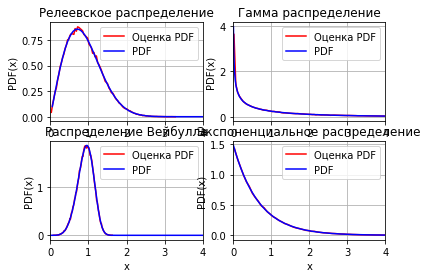

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas
import pandas as pd


def rel_pdf(rel_sigma: float, n: int, delta_x: float) -> pandas.DataFrame:
    """
    Вычисляет Релеевскую кривую плотности распределения вероятности по известной формуле
    :param rel_sigma: среднеквадратическое отклонение
    :param n: количество рассчитанных точек
    :param delta_x: шаг расчета по оси Ох
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    for i in range(1, n):
        x = i * delta_x
        pdf_x.append(x)
        pdf_y.append(((2 * x) / rel_sigma) * math.exp((-x ** 2) / rel_sigma))
    return pd.DataFrame({'x': pdf_x, 'y': pdf_y})


def rel_rand(n: int, rel_sigma: float) -> list:
    """
    Генерирует случайные числа с Релеевской плотностью распределения вероятности
    :param n: количество отсчетов
    :param rel_sigma: среднеквадратическое отклонение
    :return: list
    """
    rel_list = []
    for i in range(n):
        rel_list.append((rel_sigma / math.sqrt(2)) * math.sqrt(-2 * math.log(random.uniform(0, 1))))
    return rel_list


def gam_pdf(v: float, b: float, n: int, delta_x: float) -> pandas.DataFrame:
    """
    Вычисляет кривую плотности Гамма распределения вероятности по известной формуле
    :param v: параметр формы
    :param b: масштабный коэффициент
    :param n: количество рассчитанных точех
    :param delta_x: шаг расчета по оси Ох
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    for i in range(1, n):
        x = i * delta_x
        pdf_x.append(x)
        pdf_y.append(((b ** v) / math.gamma(v) * (x ** (v - 1)) * math.exp(-b * x)))
    return pd.DataFrame({'x': pdf_x, 'y': pdf_y})


def gam_rand(n: int, v: float, b: float) -> list:
    """
    Генерирует случайные числа с гамма распределением плотности вероятности
    :param n: количество отсчетов
    :param v: параметр формы
    :param b: масштабный коэффициент
    :return: list
    """
    gam_list = [random.gammavariate(v, 1 / b) for i in range(n)]
    return gam_list


def weib_pdf(a: float, b: float, n: int, delta_x: float) -> pandas.DataFrame:
    """
    Вычисляет кривую плотности распределения вероятности Вейбулла по известной формуле
    :param a: масштабный коэффициент
    :param b: параметр формы
    :param n: количество рассчитанных точех
    :param delta_x: шаг расчета по оси Ох
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    for i in range(1, n):
        x = i * delta_x
        pdf_x.append(x)
        pdf_y.append((b / a) * ((x / a) ** (b - 1)) * math.exp(-(x / a) ** b))
    return pd.DataFrame({'x': pdf_x, 'y': pdf_y})


def weib_rand(n: int, a: float, b: float) -> list:
    """
    Генерирует случайные числа с распределением плотности вероятности Вейбулла
    :param n: количество отсчетов
    :param a: масштабный коэффициент
    :param b: параметр формы
    :return: list
    """
    wei_list = [random.weibullvariate(a, b) for i in range(n)]
    return wei_list


def exp_pdf(l: float, n: int, delta_x: float) -> pandas.DataFrame:
    """
    Вычисляет кривую экспоненциальной плотности распределения вероятности по известной формуле
    :param l: обратный коэффициент масштаба
    :param n: количество рассчитанных точех
    :param delta_x: шаг расчета по оси Ох
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    for i in range(1, n):
        x = i * delta_x
        pdf_x.append(x)
        pdf_y.append(l * math.exp(-l * x))
    return pd.DataFrame({'x': pdf_x, 'y': pdf_y})


def exp_rand(n: int, l: float) -> list:
    """
    Генерирует случайные числа с экспоненциальным распределением плотности вероятности
    :param n: количество отсчетов
    :param l: обратный коэффициент масштаба
    :return: list
    """
    exp_list = [random.expovariate(l) for i in range(n)]
    return exp_list


def pdf(k: int, rnd_list: list) -> pandas.DataFrame:
    """
    Получает кривую плотности распределения вероятности
    :param k: количечиво интервалов разбиения гистограммы
    :param rnd_list: случайный процесс
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    n = len(rnd_list)  # количество элементов в рассматриваемой выборке
    h = (max(rnd_list) - min(rnd_list)) / k  # ширина одного интервала
    a = min(rnd_list)  # минимальное значение в рассматриваемой выборке
    for i in range(0, k):  # проход по интервалам
        count = 0
        for j in rnd_list:  # подсчет количества вхождений значений из выборки в данный интервал
            if (a + i * h) < j < (a + (i * h) + h):
                count = count + 1
        pdf_x.append(a + i * h + h / 2)  # координата по оси абсцисс полученной кривой плотности распределения
        # вероятности
        pdf_y.append(count / (n * h))  # координата по оси ординат полученной кривой плотности распределения
        # вероятности
    d = {'x': pdf_x, 'y': pdf_y}
    return pd.DataFrame(d)


rrand = rel_rand(100000, 1)  # генерируем случайные числа с распределением Релея
r_pdf = pdf(100, rrand)  # строим плотность распределения вероятности по полученной выборке
rel = rel_pdf(1, 100, 0.05)  # получаем кривую распределения Релея по известной формуле

grand = gam_rand(100000, 0.5, 0.5)  # генерируем случайные числа с гамма распределением
g_pdf = pdf(400, grand)  # строим плотность распределения вероятности по полученной выборке
gam = gam_pdf(0.5, 0.5, 500, 0.01)  # получаем кривую гамма распределения по известной формуле

wrand = weib_rand(100000, 1, 5)  # генерируем случайные числа с распределением Вейбулла
w_pdf = pdf(100, wrand)  # строим плотность распределения вероятности по полученной выборке
weib = weib_pdf(1, 5, 500, 0.01)  # получаем кривую распределения Вейбулла по известной формуле

exprand = exp_rand(100000, 1.5)  # генерируем случайные числа с экспоненциальным распределением
e_pdf = pdf(100, exprand)  # строим плотность распределения вероятности по полученной выборке
exp = exp_pdf(1.5, 500, 0.01)  # получаем кривую экспоненциального распределения по известной формуле

# Построение графиков
fig, ax = plt.subplots(nrows=2, ncols=2)  # Создаем фигуру и четыре системы координат на фигуре

ax[0, 0].plot(r_pdf['x'], r_pdf['y'], 'r-', label='Оценка PDF')  # Своя оценка плотности распределения
ax[0, 0].plot(rel['x'], rel['y'], 'b-', label='PDF')  # Плотность распределения построенная по формуле
ax[0, 0].set(title='Релеевское распределение')  # Заголовок для системы координат
ax[0, 0].set_xlabel('x')  # Ось абсцисс
ax[0, 0].set_ylabel('PDF(x)')  # Ось ординат
ax[0, 0].set_xlim(xmin=0, xmax=4)  # Минимальное и максимальное значение по оси Х
ax[0, 0].legend()  # Отображаем легенду для данной системы координат
ax[0, 0].grid()  # Отображаем сетку на системе координат

ax[0, 1].plot(g_pdf['x'], g_pdf['y'], 'r-', label='Оценка PDF')  # Своя оценка плотности распределения
ax[0, 1].plot(gam['x'], gam['y'], 'b-', label='PDF')  # Плотность распределения построенная по формуле
ax[0, 1].set(title='Гамма распределение')  # Заголовок для системы координат
ax[0, 1].set_xlabel('x')  # Подписи по оси абсцисс
ax[0, 1].set_ylabel('PDF(x)')  # Подписи по оси ординат
ax[0, 1].set_xlim(xmin=0, xmax=4)  # Минимальное и максимальное значение по оси Х
ax[0, 1].legend()  # Отображаем легенду для данной системы координат
ax[0, 1].grid()  # включение отображение сетки

ax[1, 0].plot(w_pdf['x'], w_pdf['y'], 'r-', label='Оценка PDF')
ax[1, 0].plot(weib['x'], weib['y'], 'b-', label='PDF')
ax[1, 0].set(title='Распределение Вейбулла')
ax[1, 0].set_xlabel('x')  # ось абсцисс
ax[1, 0].set_ylabel('PDF(x)')  # ось ординат
ax[1, 0].set_xlim(xmin=0, xmax=4)
ax[1, 0].legend()
ax[1, 0].grid()  # включение отображение сетки

ax[1, 1].plot(e_pdf['x'], e_pdf['y'], 'r-', label='Оценка PDF')
ax[1, 1].plot(exp['x'], exp['y'], 'b-', label='PDF')
ax[1, 1].set(title='Экспоненциальное распределение')
ax[1, 1].set_xlabel('x')  # ось абсцисс
ax[1, 1].set_ylabel('PDF(x)')  # ось ординат
ax[1, 1].set_xlim(xmin=0, xmax=4)
ax[1, 1].legend()
ax[1, 1].grid()  # включение отображение сетки

plt.show()